<a href="https://colab.research.google.com/github/stephenbaum/regression-coding/blob/main/regression_coding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import the packages of interest
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# set a seed
np.random.seed(1234)

In [3]:
# create the id variable
ids = np.arange(1,1001)

In [4]:
# create conditions
condition_one = np.random.randint(0, 2, size=1000)
condition_two = np.random.randint(0, 2, size=1000)

In [5]:
# create the dependent variable, by condition
dependent_variable = []
for i in range(1000):
    if condition_one[i] == 0 and condition_two[i] == 0:
        mean = 45
    elif condition_one[i] == 0 and condition_two[i] == 1:
        mean = 50
    elif condition_one[i] == 1 and condition_two[i] == 0:
        mean = 55
    elif condition_one[i] == 1 and condition_two[i] == 1:
        mean = 70
    dependent_variable.append(np.random.normal(loc=mean, scale=5))


In [6]:
# put everything together for a dataframe
df = pd.DataFrame({'ID': ids,
                   'Condition_One': condition_one,
                   'Condition_Two': condition_two,
                   'Dependent_Variable': dependent_variable})
print(df.head())

   ID  Condition_One  Condition_Two  Dependent_Variable
0   1              1              1           73.427808
1   2              1              1           69.212780
2   3              0              1           56.906439
3   4              1              0           55.342133
4   5              0              1           51.562681


In [12]:
# combine mean and sem into one display
df.groupby(['Condition_One','Condition_Two'])['Dependent_Variable'].agg(['mean','sem']).round(2)
# distributions look like waht we want, for the most part

mean   sem
Condition_One Condition_Two             
0             0              45.36  0.34
              1              49.41  0.31
1             0              55.35  0.31
              1              70.24  0.31

In [13]:
# change condition variables to numeric
df['Condition_One'] = pd.to_numeric(df['Condition_One'])
df['Condition_Two'] = pd.to_numeric(df['Condition_Two'])

In [14]:
# the full model
mod1 = smf.ols(formula='Dependent_Variable ~ Condition_One * Condition_Two', data=df).fit()
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:     Dependent_Variable   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     1184.
Date:                Sun, 02 Mar 2025   Prob (F-statistic):               0.00
Time:                        23:42:33   Log-Likelihood:                -3022.2
No. Observations:                1000   AIC:                             6052.
Df Residuals:                     996   BIC:                             6072.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [33]:
# graph the parameters from mod1
print(mod1.params.round(2))
# put all of these into a graphic

Intercept                      45.36
Condition_One                   9.99
Condition_Two                   4.05
Condition_One:Condition_Two    10.84
dtype: float64


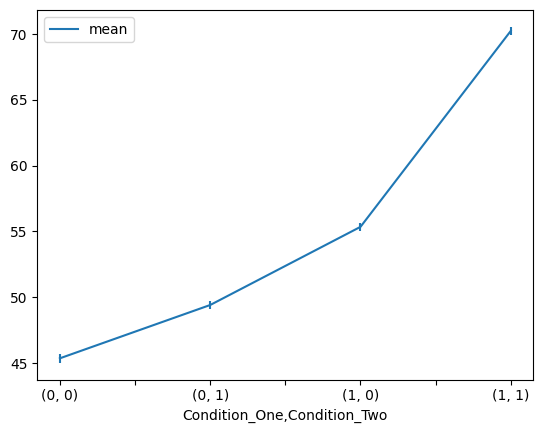

In [28]:
# plot these means and 95% CIs
df.groupby(['Condition_One','Condition_Two'])['Dependent_Variable'].agg(['mean','sem']).round(2).plot(kind='line', yerr='sem')
plt.show()

In [ ]:
# in essence, this chart (and the regression) are showing actual cell differences
# this is because '0' is meaningful - it corresponds with one of our categories
# 0, 0 is the intercept
# 0, 1 is going from ~45 to ~49 - this comes from how, when Condition_One = 0, the effect of Condition_Two is an increase of ~4
# 1, 0 is going from ~45 to ~55 - this comes from how, when Condition_Two = 0, the effect of Condition_One is an increase of ~10
# 1, 1 is going from ~45 to ~70 - this is the combination of all three of the coefficients

In [41]:
# now, can change things slightly so that we can capture the effect coding
df.head()

,ID,Condition_One,Condition_Two,Dependent_Variable,Condition_One_EC,Condition_Two_EC
0,1,1,1,73.427808,0.5,0.5
1,2,1,1,69.212780,0.5,0.5
2,3,0,1,56.906439,-0.5,0.5
3,4,1,0,55.342133,0.5,-0.5
4,5,0,1,51.562681,-0.5,0.5


In [39]:
# making the new predictors
df['Condition_One_EC'] = df['Condition_One'] - 0.5 # we will do +0.5 and -0.5, but can adjust if needed
df['Condition_Two_EC'] = df['Condition_Two'] - 0.5

In [42]:
# look at the means again
df.groupby(['Condition_One_EC','Condition_Two_EC'])['Dependent_Variable'].agg(['mean','sem']).round(2)
# just to reaffirm the intuition that the means and ses have not changed lol

mean   sem
Condition_One_EC Condition_Two_EC             
-0.5             -0.5              45.36  0.34
                  0.5              49.41  0.31
 0.5             -0.5              55.35  0.31
                  0.5              70.24  0.31

In [40]:
# rerun the model, but with the effect coded predictors this time
mod2 = smf.ols(formula='Dependent_Variable ~ Condition_One_EC * Condition_Two_EC', data=df).fit()
print(mod2.summary())

                            OLS Regression Results                            
Dep. Variable:     Dependent_Variable   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     1184.
Date:                Sun, 02 Mar 2025   Prob (F-statistic):               0.00
Time:                        23:57:38   Log-Likelihood:                -3022.2
No. Observations:                1000   AIC:                             6052.
Df Residuals:                     996   BIC:                             6072.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

In [ ]:
# we can see that the model fit is exactly the same
# the interaction coefficient and test statistic are the same as well

In [44]:
# graph mod2
print(mod2.params.round(2))

Intercept                            55.09
Condition_One_EC                     15.41
Condition_Two_EC                      9.47
Condition_One_EC:Condition_Two_EC    10.84
dtype: float64


In [61]:
# what is the intercept?
df['Dependent_Variable'].mean().round(2) # it is NOT this - why?
# it is the grand mean
df.groupby(['Condition_One_EC','Condition_Two_EC'])['Dependent_Variable'].agg(['mean','sem']).round(2)
# so, it is the sum of each of these means
grand_mean = (45.36 + 49.41 + 55.35 + 70.24) / 4
print(grand_mean)
if grand_mean == mod2.params[0].round(2):
    print('Correct!') # yep, the grand mean
else:
    print('Incorrect!')

55.09
Correct


<ipython-input-61-badf5743e400>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if grand_mean == mod2.params[0].round(2):


In [69]:
# now, what do each of the parameters signify?

# first, the effect of 'Condition One'
print(df[df['Condition_One_EC']==-0.5]['Dependent_Variable'].mean().round(2))
print(df[df['Condition_One_EC']==+0.5]['Dependent_Variable'].mean().round(2))

# these are the two means - we are collapsing ACROSS condition_two (because of the effect coding estimating marginal effects)
df[df['Condition_One_EC']==+0.5]['Dependent_Variable'].mean().round(2) - df[df['Condition_One_EC']==-0.5]['Dependent_Variable'].mean().round(2)
# and so, the differrence is this coefficient, roughly
# of course, there is the weighting by sample size

47.6
62.72


15.119999999999997

In [88]:
# if we really care about benchmarking that:
'''
df.groupby(['Condition_One_EC','Condition_Two_EC'])['Dependent_Variable'].agg(['mean','sem','count']).round(2)
print(45.36*(1-0.5536842105263158)+49.41*(0.5536842105263158))
print(55.348971*(0.5047619047619047)+70.238644*(0.49523809523809526))
'''

47.60242105263158
62.722904295238095


In [71]:
# and now, the effect of condition two
print(df[df['Condition_Two_EC']==-0.5]['Dependent_Variable'].mean().round(2))
print(df[df['Condition_Two_EC']==+0.5]['Dependent_Variable'].mean().round(2))

# the comparison
df[df['Condition_Two_EC']==+0.5]['Dependent_Variable'].mean().round(2) - df[df['Condition_Two_EC']==-0.5]['Dependent_Variable'].mean().round(2)

50.91
59.76


8.850000000000001

In [89]:
# here, it is more clear that the weighting is doing something slightly weird, given the difference in the Ns

# so, let's unpack this a little bit more fully to really understand
df.groupby(['Condition_One_EC','Condition_Two_EC'])['Dependent_Variable'].agg(['mean','sem','count']).round(2)

mean   sem  count
Condition_One_EC Condition_Two_EC                    
-0.5             -0.5              45.36  0.34    212
                  0.5              49.41  0.31    263
 0.5             -0.5              55.35  0.31    265
                  0.5              70.24  0.31    260

In [94]:
(212)/(212+265)
45.36*(0.4444444444444444)+55.35*(1-0.4444444444444444) # the first mean - dragged towards 55.35
263/(263+260) # this is where the different in N comes from, really
49.41*(0.502868068833652)+70.24*(1-0.502868068833652) # the second mean is more balanced

59.76525812619502

In [ ]:
# and, the interaction is the additional effect when we make Condition_Two_Ec = +0.5